In [103]:
##Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

for dirname, _, filenames in os.walk('/kaggle/input/vct-masters-tokyo-dataset4'):
    for filename in filenames:
        print(os.path.join(dirname, filename)) 


/kaggle/input/vct-masters-tokyo-dataset4/Valorant Champions Tour 2023 Masters Tokyo dataset.csv


In [136]:
data = pd.read_csv('/kaggle/input/vct-masters-tokyo-dataset4/Valorant Champions Tour 2023 Masters Tokyo dataset.csv') #Make sure to be case specific
print(data.to_string())

          Player               Nationality  Team                       Agents  RND     R    ACS   K:D KAST    ADR   KPR   APR  FKPR  FDPR  HS%  CL%     CL  KMAX    K    D    A  FK  FD  Total Rounds Won  Total Rounds Loss
0          aspas                    Brazil  LOUD                   Jett, Neon   80  1.04  252.0  1.02  69%  159.0  0.83  0.19  0.21  0.20  28%  NaN    0/8    20   66   65   15  17  16                28                 52
1           Less                    Brazil  LOUD               Viper, Killjoy   80  0.91  199.5  0.89  65%  136.7  0.71  0.20  0.04  0.11  23%  13%   2/16    26   57   64   16   3   9                28                 52
2           tuyz                    Brazil  LOUD                         Omen   80  0.91  199.5  0.89  65%  136.7  0.71  0.20  0.04  0.11  23%  13%   2/16    26   57   64   16   3   9                28                 52
3         cauanz                    Brazil  LOUD           Breach, Sova, Skye   80  0.77  170.3  0.72  63%  110.2  0

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player             61 non-null     object 
 1   Nationality        61 non-null     object 
 2   Team               61 non-null     object 
 3   Agents             61 non-null     object 
 4   RND                61 non-null     int64  
 5   R                  61 non-null     float64
 6   ACS                61 non-null     float64
 7   K:D                61 non-null     float64
 8   KAST               61 non-null     object 
 9   ADR                61 non-null     float64
 10  KPR                61 non-null     float64
 11  APR                61 non-null     float64
 12  FKPR               61 non-null     float64
 13  FDPR               61 non-null     float64
 14  HS%                61 non-null     object 
 15  CL%                55 non-null     object 
 16  CL                 61 non-nu

# **Dataset Averages by Team**

In [68]:
#Participated Teams

print('Number of teams participated: ', len(data['Team'].unique()))
print('Participated Teams : ', data['Team'].unique())

Number of teams participated:  12
Participated Teams :  ['LOUD' 'ASE' 'NAVI' 'FUT' 'TL' 'T1' 'FNC' 'DRX' 'PRX' 'EDG' 'NRG' 'EG']


In [67]:
data.describe()
data.groupby(['Team']).mean()

/tmp/ipykernel_32/3558253277.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,RND,R,ACS,K:D,ADR,KPR,APR,FKPR,FDPR,KMAX,K,D,A,FK,FD,Total Rounds Won,Total Rounds Loss
Team,,,,,,,,,,,,,,,,,
ASE,101.0,0.920000,195.08,0.856,129.300000,0.666000,0.336000,0.108000,0.094,18.600000,67.600000,79.0,33.800000,10.800000,9.400000,41.000000,60.000000
DRX,192.5,0.968333,197.35,0.930,128.616667,0.671667,0.336667,0.101667,0.125,21.166667,130.666667,137.5,66.833333,17.833333,20.666667,99.166667,107.166667
EDG,341.0,1.054000,208.02,1.092,134.300000,0.746000,0.276000,0.106000,0.096,26.800000,254.600000,232.6,94.200000,36.000000,32.200000,184.000000,157.000000
EG,401.0,1.062000,203.44,1.072,133.420000,0.712000,0.324000,0.106000,0.096,24.800000,286.400000,267.2,129.600000,42.600000,37.600000,232.000000,169.000000
FNC,210.0,1.196000,217.10,1.304,136.960000,0.758000,0.352000,0.110000,0.090,23.200000,159.400000,124.0,74.200000,23.200000,18.800000,127.000000,83.000000
FUT,162.0,0.974000,194.74,0.970,126.060000,0.692000,0.322000,0.102000,0.096,21.800000,111.800000,115.4,52.200000,16.600000,15.800000,76.000000,86.000000
LOUD,80.0,0.854000,190.26,0.802,126.140000,0.650000,0.250000,0.086000,0.126,19.400000,52.000000,65.0,20.000000,6.800000,10.000000,28.000000,52.000000
NAVI,124.0,0.996000,194.16,0.970,131.980000,0.684000,0.274000,0.110000,0.090,24.000000,85.000000,88.6,33.800000,13.800000,11.000000,55.000000,69.000000
NRG,351.0,1.034000,195.90,1.030,130.720000,0.686000,0.330000,0.092000,0.106,22.200000,241.000000,234.6,115.400000,32.800000,37.400000,186.000000,165.000000


# **Player Nationalities**

South Korea                 11
China                        9
United States of America     7
Turkey                       7
Russia                       5
Brazil                       4
Sweden                       3
Indonesia                    2
Finland                      2
United Kingdom               2
Argentina                    1
Malaysia                     1
Singapore                    1
Ukraine                      1
Thailand                     1
Taiwan                       1
Latvia                       1
Canada                       1
Cambodia                     1
Name: Nationality, dtype: int64


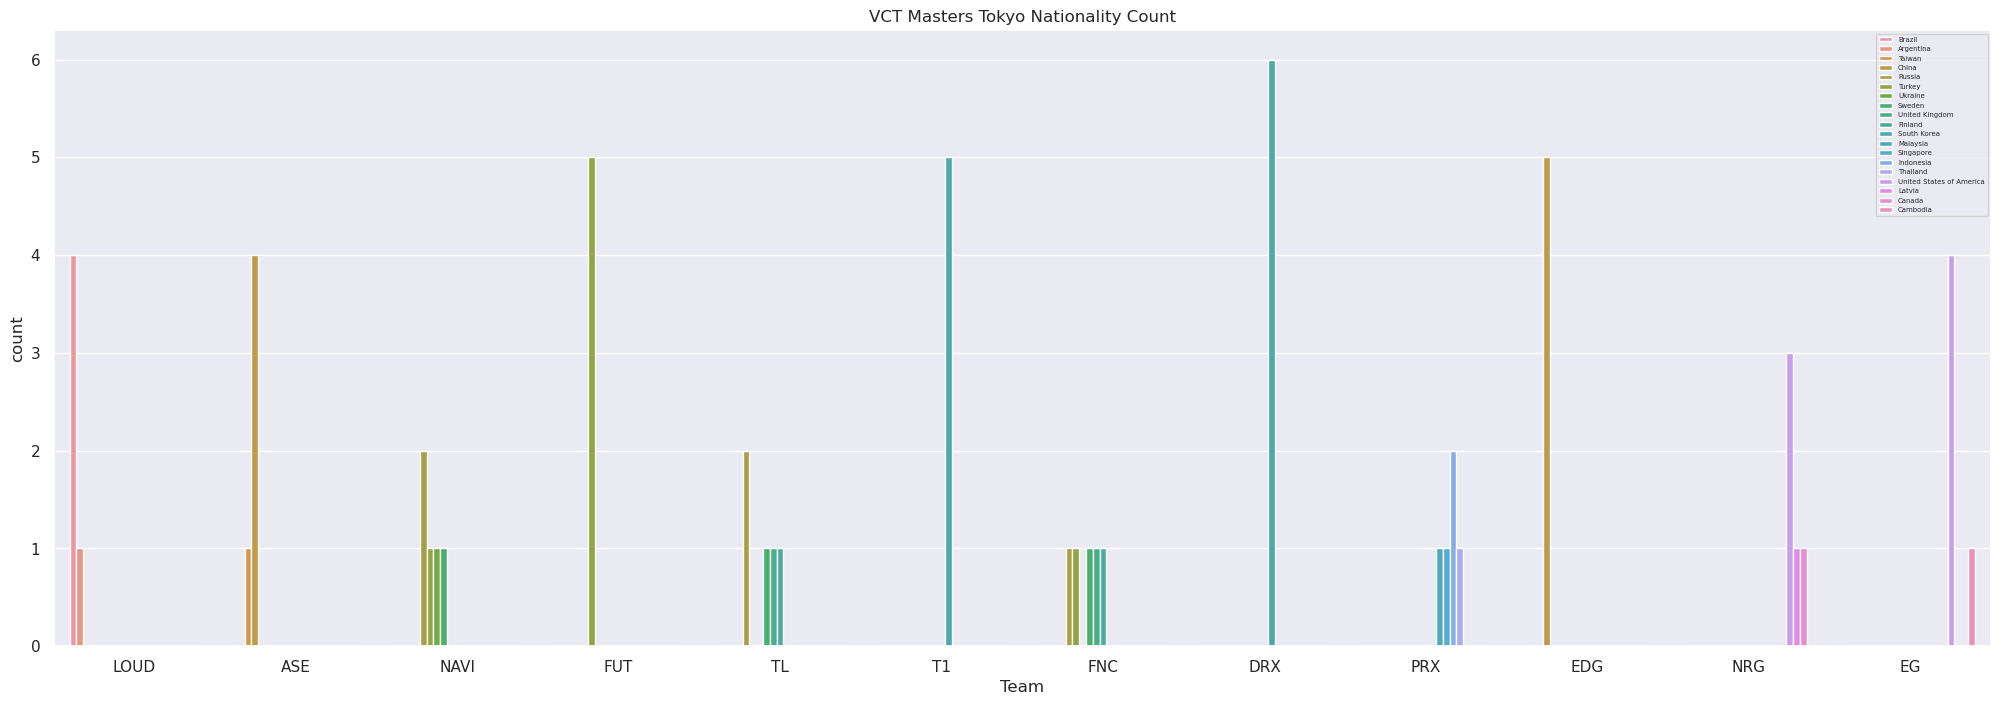

In [138]:
nationality_counts = data.Nationality.value_counts()
print(nationality_counts)

plt.figure(figsize=(25,8))
plt.title("VCT Masters Tokyo Nationality Count",fontsize=12)
sns.countplot(data, x = "Team", hue = "Nationality")
plt.legend(fontsize = 5, loc='upper right')
plt.show()

This plot just goes to show that South Korea has a major global prescence in the esports scene.

# **Highest and Lowest Kill:Death Ratio (K:D)**

In [70]:
data.loc[data['K:D']==max(data['K:D']),:]

,Player,Nationality,Team,Agents,RND,R,ACS,K:D,KAST,ADR,...,CL%,CL,KMAX,K,D,A,FK,FD,Total Rounds Won,Total Rounds Loss
30,Alfajer,Turkey,FNC,"Killjoy, Cypher",210,1.31,229.2,1.63,80%,143.3,...,21%,6/29,25,184,113,34,23,12,127,83


In [71]:
data.loc[data['K:D']==min(data['K:D']),:]

,Player,Nationality,Team,Agents,RND,R,ACS,K:D,KAST,ADR,...,CL%,CL,KMAX,K,D,A,FK,FD,Total Rounds Won,Total Rounds Loss
4,saadhak,Argentina,LOUD,"KAY/O, Viper",80,0.64,130.0,0.49,65%,88.1,...,8%,1/12,10,32,65,32,4,10,28,52


Alfajer from FNC had the highest K:D out of all the other players in VCT Masters Tokyo. Meanwhile, saadhak had the lowest K:D. However, keep in mind that LOUD were eliminated immediately from UB Quarterfinals and Lower Bracket Round 1. Alfajer has played 210 rounds of VCT Masters Tokyo, but saadhak has only played 80.

In [72]:
data.loc[data['K']==max(data['K']),:]

,Player,Nationality,Team,Agents,RND,R,ACS,K:D,KAST,ADR,...,CL%,CL,KMAX,K,D,A,FK,FD,Total Rounds Won,Total Rounds Loss
46,ZmjjKK,China,EDG,"Jett, Gekko, Raze",341,1.15,273.8,1.3,73%,169.7,...,13%,3/23,30,329,254,59,82,54,184,157


In [73]:
data.loc[data['K']==min(data['K']),:]

,Player,Nationality,Team,Agents,RND,R,ACS,K:D,KAST,ADR,...,CL%,CL,KMAX,K,D,A,FK,FD,Total Rounds Won,Total Rounds Loss
4,saadhak,Argentina,LOUD,"KAY/O, Viper",80,0.64,130.0,0.49,65%,88.1,...,8%,1/12,10,32,65,32,4,10,28,52


In this table, we see that Kang Kang (ZmjjKK) ended the VCT Masters Tokyo 2023 series with the highest kills, which is 329 from 341 rounds played. However, saadhak, again, ended the series with 32 kills in 80 rounds played. This would explain saadhak's 0.4 KPR (Kills per round).

# **Headshot Percentages Above 30%**

In [74]:
data.loc[data['HS%']>'30%']

,Player,Nationality,Team,Agents,RND,R,ACS,K:D,KAST,ADR,...,CL%,CL,KMAX,K,D,A,FK,FD,Total Rounds Won,Total Rounds Loss
10,SUYGETSU,Russia,NAVI,"Cypher, Viper, Killjoy",124,1.10,205.8,1.17,72%,144.8,...,21%,3/14,23,91,78,28,6,12,55,69
11,Shao,Russia,NAVI,"Fade, Killjoy, Astra, +1",124,1.05,190.6,1.15,73%,137.4,...,7%,2/27,34,90,78,27,8,10,55,69
14,Zyppan,Sweden,NAVI,"KAY/O, Fade, Skye",124,0.89,163.6,0.80,70%,111.8,...,9%,1/11,19,73,91,40,13,6,55,69
18,qRaxs,Turkey,FUT,"KAY/O, Gekko",162,0.94,206.8,0.90,77%,135.4,...,6%,1/17,21,111,124,71,14,12,76,86
22,soulcas,United Kingdom,TL,"Skye, Sage, Fade, +2",169,0.94,176.8,0.94,73%,117.9,...,9%,2/23,18,109,116,49,7,13,75,94
24,Redgar,Russia,TL,Omen,169,0.78,136.1,0.69,69%,87.5,...,11%,2/18,16,82,118,70,13,21,75,94
47,Smoggy,China,EDG,"Breach, Killjoy, Jett, +1",341,1.07,195.3,1.13,77%,130.3,...,19%,9/47,31,251,222,92,27,23,184,157
57,Demon1,United States of America,EG,"Jett, Brimstone, Chamber",401,1.09,210.9,1.19,73%,143.2,...,21%,11/53,28,318,267,69,56,39,232,169


In this table, we see that SUYGETSU, Shao, Zyppan, qRaxs, soulcas, Redgar, Smoggy, and Demon1 are the only people to have a Headshot Percentage above 30%.

# KAST vs Kill vs Death vs Headshot Percentage Analysis

In [75]:
fig = make_subplots(rows = 1, cols = 3)

fig.add_trace(go.Scatter(x = data.K, y = data.KAST, name = 'Kills', mode = 'markers'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = data.D, y = data.KAST, name = 'Death', mode = 'markers'), row = 1, col = 2)
fig.add_trace(go.Scatter(x = data['HS%'], y = data.KAST, name = 'Headshot Percentage', mode = 'markers'), row = 1, col = 3)

fig.update_layout(
    title='Relationship between Kill/Assist/Trade/Survival Percentage (KAST), Kill, Death and Headshot percentage',
)
fig.update_xaxes(title_text='Kills', row=1, col=1)
fig.update_xaxes(title_text='Death', row=1, col=2)
fig.update_xaxes(title_text='Headshot Percentage', row=1, col=3)

fig.update_yaxes(title_text='KAST', row=1, col=1)
fig.update_yaxes(title_text='KAST', row=1, col=2)
fig.update_yaxes(title_text='KAST', row=1, col=3)
fig.show()

Many people within the First Person Shooter community say that headshot percentage isn't always correlated to a win, and this is exactly what that graph shows. Yes, higher kills and deaths tend to result to a higher KAST, but just having a high headshot percentage does not necessarily result to higher KAST.

# **Does headshot percentages correlate to more round wins and does first kill really matter?**

In [76]:
fig = make_subplots(rows = 1, cols = 2)

fig.add_trace(go.Scatter(x = data['HS%'], y = data['Total Rounds Won'], name = 'Headshot Percentage to Total Rounds Won', mode = 'markers'), row = 1, col = 1)

fig.add_trace(go.Scatter(x = data['HS%'], y = data['Total Rounds Loss'], name = 'Headshot Percentage to Total Rounds Loss', mode = 'markers'), row = 1, col = 2)

fig.update_xaxes(title_text='Headshot Percentage', row=1, col=1)
fig.update_xaxes(title_text='Headshot Percentage', row=1, col=2)

fig.update_yaxes(title_text='Total Rounds Won', row=1, col=1)
fig.update_yaxes(title_text='Total Rounds Lost', row=1, col=2)

fig.update_layout(
    title='Relationship between Headshot Percentage to Total Rounds Won and Lost',
)

fig.show()

Theres not much correlation with headshot percentage to winning or losing more rounds.

In [77]:
fig = make_subplots(rows = 1, cols = 2)

fig.add_trace(go.Scatter(x = data['FKPR'], y = data['Total Rounds Won'], name = 'FKPR to Total Rounds Won', mode = 'markers'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = data['FDPR'], y = data['Total Rounds Loss'], name = 'FDPR to Total Rounds Lost', mode = 'markers'), row = 1, col = 2)

fig.update_xaxes(title_text='First Kills Per Round (FKPR)', row=1, col=1)
fig.update_xaxes(title_text='First Deaths Per Round (FDPR)', row=1, col=2)

fig.update_yaxes(title_text='Total Rounds Won', row=1, col=1)
fig.update_yaxes(title_text='Total Rounds Lost', row=1, col=2)

fig.update_layout(
    title='Relationship between First Kills and Deaths Per Round to Total Rounds Won and Lost',
)

fig.show()

In [78]:
fig = make_subplots(rows = 1, cols = 2)

fig.add_trace(go.Scatter(x = data['KAST'], y = data['Total Rounds Won'], name = 'FKPR to Total Rounds Won', mode = 'markers'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = data['KAST'], y = data['Total Rounds Loss'], name = 'FKPR to Total Rounds Won', mode = 'markers'), row = 1, col = 2)

fig.update_xaxes(title_text='Kill/Assist/Trade/Survival Percentage (KAST)', row=1, col=1)
fig.update_xaxes(title_text='Kill/Assist/Trade/Survival Percentage (KAST)', row=1, col=2)

fig.update_yaxes(title_text='Total Rounds Won', row=1, col=1)
fig.update_yaxes(title_text='Total Rounds Lost', row=1, col=2)

fig.update_layout(
    title='Relationship between Kill/Assist/Trade/Survival Percentage (KAST) to Total Rounds Won and Lost',
)

fig.show()

I think from all of this data, it means that headshot rate generally does not matter when it comes to winning more rounds

# **Rounds Won and Lost by Teams**


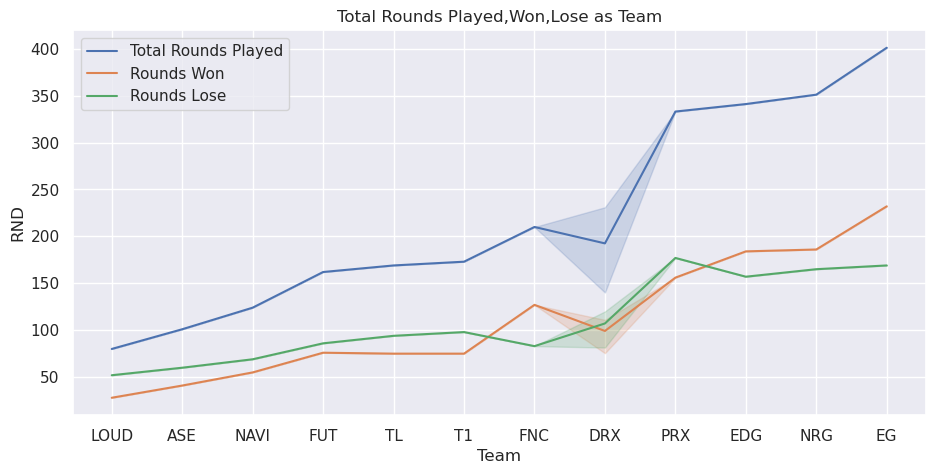

In [139]:
plt.title("Total Rounds Played,Won,Lose as Team",fontsize=12)
sns.lineplot(y='RND',x='Team',data = data,label='Total Rounds Played')
sns.lineplot(y='Total Rounds Won',x='Team',data = data,label='Rounds Won')
sns.lineplot(y='Total Rounds Loss',x='Team',data = data,label='Rounds Lose')
plt.show()

In [120]:
sort_KAST=data.sort_values('KAST' , ascending=False)
sort_KAST = sort_KAST[:10] #Top 10 players in VCT Tokyo
sort_KAST

,Player,Nationality,Team,Agents,RND,R,ACS,K:D,KAST,ADR,...,CL%,CL,KMAX,K,D,A,FK,FD,Total Rounds Won,Total Rounds Loss
30,Alfajer,Turkey,FNC,"Killjoy, Cypher",210,1.31,229.2,1.63,80%,143.3,...,21%,6/29,25,184,113,34,23,12,127,83
31,Leo,Sweden,FNC,"Fade, Skye",210,1.29,200.9,1.47,80%,129.4,...,18%,4/22,26,150,102,94,11,2,127,83
49,Haodong,China,EDG,"Brimstone, Omen, Harbor, +1",341,1.02,187.4,0.98,80%,118.0,...,18%,6/33,24,228,232,124,30,32,184,157
34,Boaster,United Kingdom,FNC,"Brimstone, Astra, Omen",210,1.05,171.3,0.91,78%,104.8,...,6%,1/18,15,116,127,110,16,14,127,83
56,Ethan,United States of America,EG,"Skye, Breach, KAY/O",401,1.09,190.4,1.07,78%,118.6,...,24%,10/42,20,262,246,231,20,23,232,169
18,qRaxs,Turkey,FUT,"KAY/O, Gekko",162,0.94,206.8,0.90,77%,135.4,...,6%,1/17,21,111,124,71,14,12,76,86
47,Smoggy,China,EDG,"Breach, Killjoy, Jett, +1",341,1.07,195.3,1.13,77%,130.3,...,19%,9/47,31,251,222,92,27,23,184,157
48,CHICHOO,China,EDG,"Killjoy, Cypher, Viper",341,1.05,191.7,1.09,77%,127.8,...,20%,10/50,27,232,213,84,22,19,184,157
32,Chronicle,Russia,FNC,"Breach, Viper",210,1.21,236.8,1.33,76%,149.6,...,NaN,0/11,22,174,131,91,15,19,127,83
41,d4v41,Malaysia,PRX,"Viper, Skye, Killjoy, +1",333,1.05,188.3,1.00,76%,127.8,...,12%,7/58,23,222,223,134,26,16,156,177
